<a href="https://colab.research.google.com/github/TG5128/MachineLearning/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

## Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
 df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [13]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Data Exploration

<ipython-input-15-c49a56295a0c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=20)
<ipython-input-15-c49a56295a0c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=20)
<ipython-input-15-c49a56295a0c>:7: UserWarning: 

`distplot` is a deprecated function and will be remove

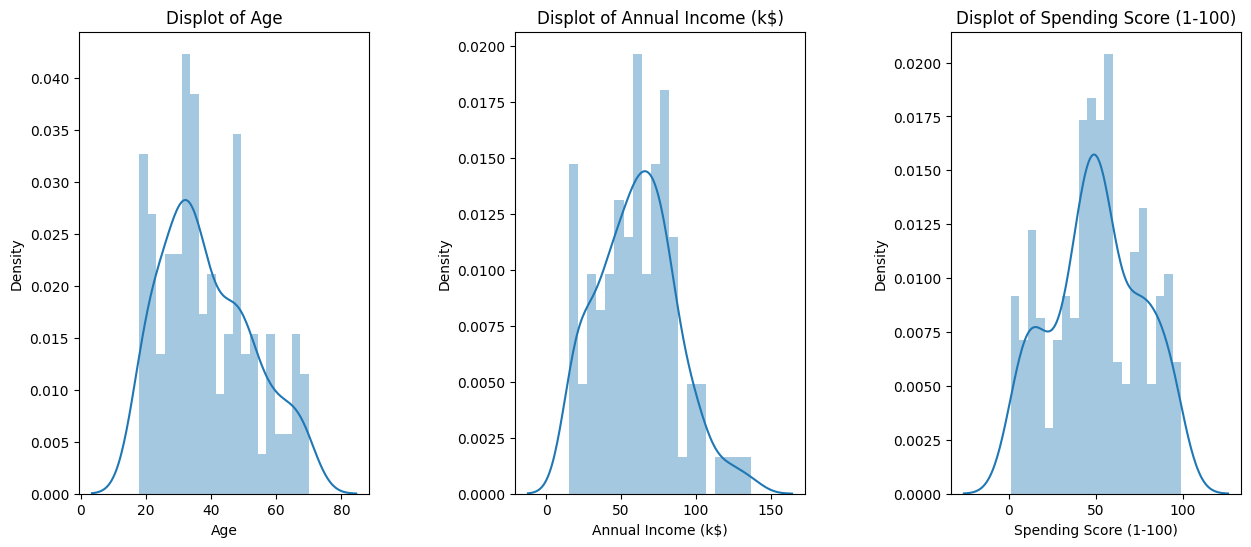

In [15]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Displot of {}'.format(x))
plt.show()

Here most of the consumer are in age group of 20 to 40, Most consumers have annual income from 50k to 60k and Most of the consumers have spending score as 50

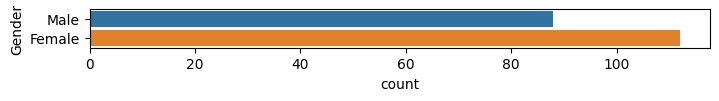

In [22]:
plt.figure(figsize=(8,0.5))
sns.countplot(y='Gender',data=df)
plt.show()

Here there are higher number of female consumers that males

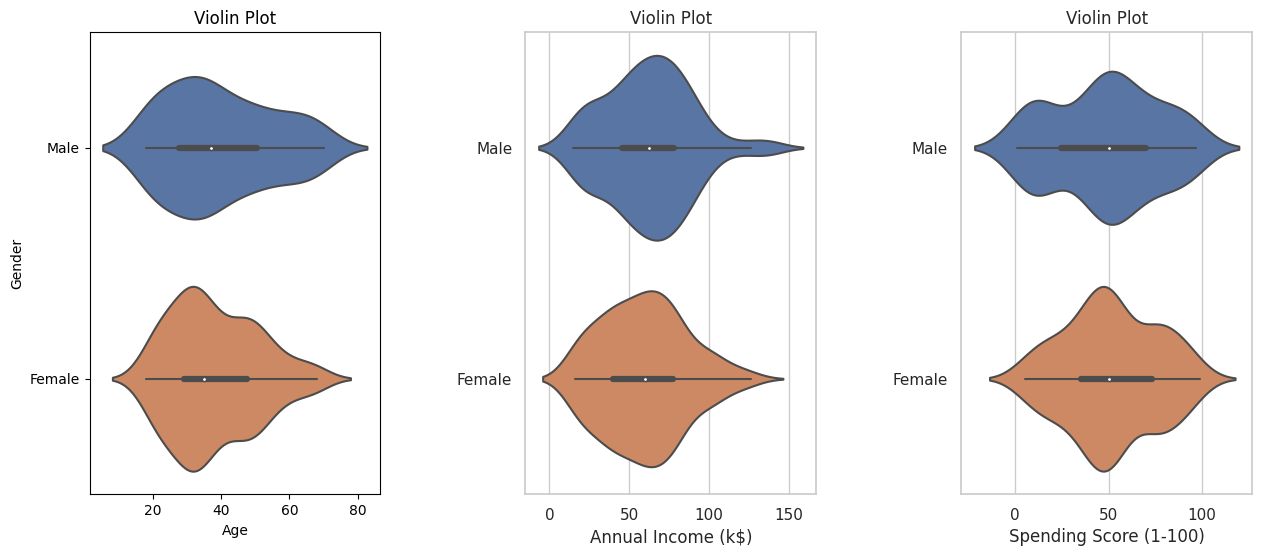

In [23]:
plt.figure(1,figsize=(15,6))
n=0
for m in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x= m, y='Gender', data=df)
    plt.ylabel("Gender" if n==1 else '')
    plt.title('Violin Plot')
plt.show()

Checking distribution of Male and Female with regards to Age, annual income and Spending Score

In [28]:
age_18_25=df.Age[(df.Age>=18) & (df.Age <=25)]
age_26_35=df.Age[(df.Age>=26) & (df.Age <=35)]
age_36_45=df.Age[(df.Age>=36) & (df.Age <=45)]
age_46_55=df.Age[(df.Age>=46) & (df.Age <=55)]
age_Above_55=df.Age[df.Age>=56]

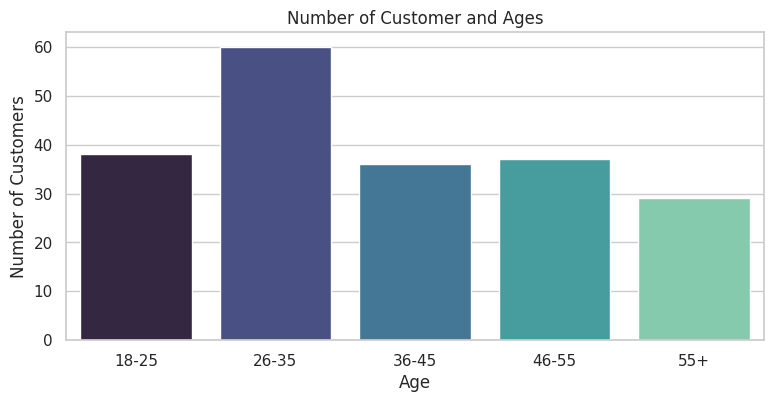

In [35]:
agex = ["18-25",'26-35','36-45','46-55','55+']
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_Above_55.values)]
plt.figure(figsize=(9,4))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title('Number of Customer and Ages')
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


Here, Most consumers are in age group of 26-35

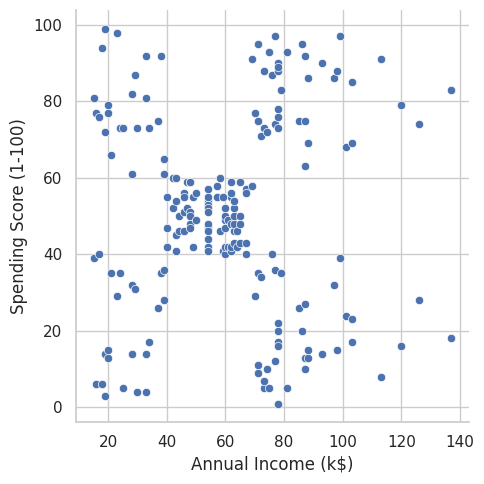

In [37]:
sns.relplot(x='Annual Income (k$)', y="Spending Score (1-100)", data=df)

Here, For annual income less than 40k and More than 70k there is no relationship between annual income and Spending Score but for annual income between 40k and 60k there is relation ship between annual income and spending score


In [38]:
ss_1_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=1) & (df['Spending Score (1-100)'] <=20)]
ss_21_40=df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=21) & (df['Spending Score (1-100)'] <=40)]
ss_41_60=df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=41) & (df['Spending Score (1-100)'] <=60)]
ss_61_80=df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=61) & (df['Spending Score (1-100)'] <=80)]
ss_81_100=df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=81) & (df['Spending Score (1-100)'] <=100)]

In [39]:
ssx=['1-20','21-40','41-60','61-80','81-100']
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

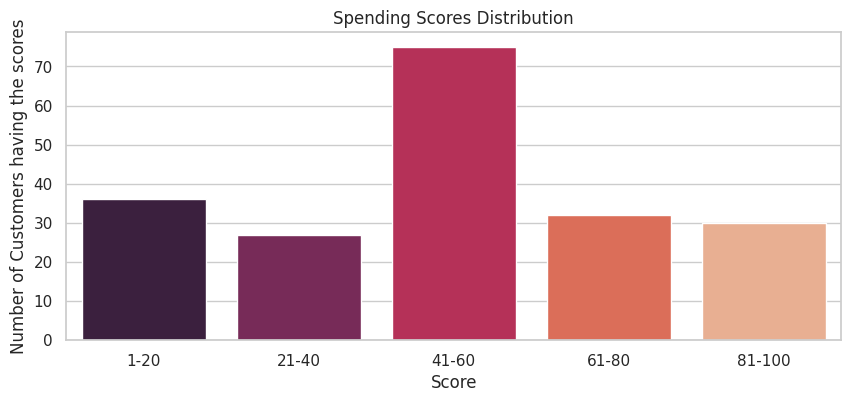

In [42]:
plt.figure(figsize=(10,4))
sns.barplot(x=ssx, y=ssy, palette='rocket')
plt.title("Spending Scores Distribution")
plt.xlabel("Score")
plt.ylabel('Number of Customers having the scores')
plt.show()


The Highest number of consumers have spending scores between 41-60

In [43]:
ai_0_30=df['Annual Income (k$)'][(df['Annual Income (k$)'] >=0) & (df['Annual Income (k$)'] <=30)]
ai_31_60=df['Annual Income (k$)'][(df['Annual Income (k$)'] >=31) & (df['Annual Income (k$)'] <=60)]
ai_61_90=df['Annual Income (k$)'][(df['Annual Income (k$)'] >=61) & (df['Annual Income (k$)'] <=90)]
ai_91_120=df['Annual Income (k$)'][(df['Annual Income (k$)'] >=91) & (df['Annual Income (k$)'] <=120)]
ai_121_150=df['Annual Income (k$)'][(df['Annual Income (k$)'] >=121) & (df['Annual Income (k$)'] <=150)]

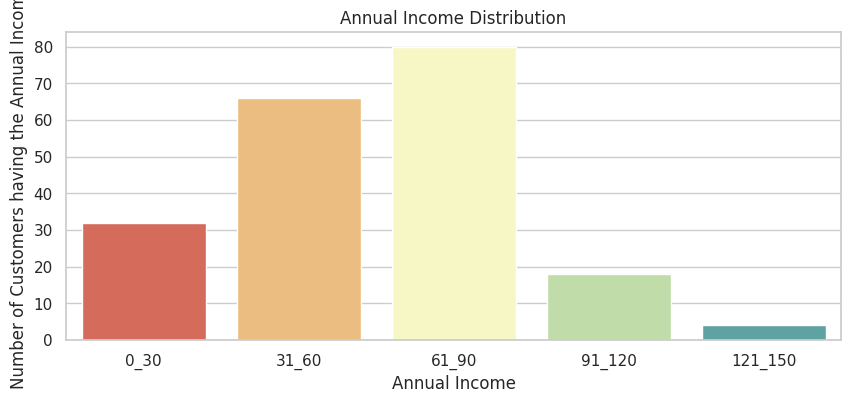

In [46]:
aix=['0_30','31_60','61_90','91_120','121_150']
aiy=[len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]
plt.figure(figsize=(10,4))
sns.barplot(x=aix, y=aiy, palette='Spectral')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel('Number of Customers having the Annual Income')
plt.show()

Most of consumers have annual income between 65-90k

## Performing K means Clustering

Performing Clustering by considering relationship between age and Spending score

Finding Optimal number of clusters using elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

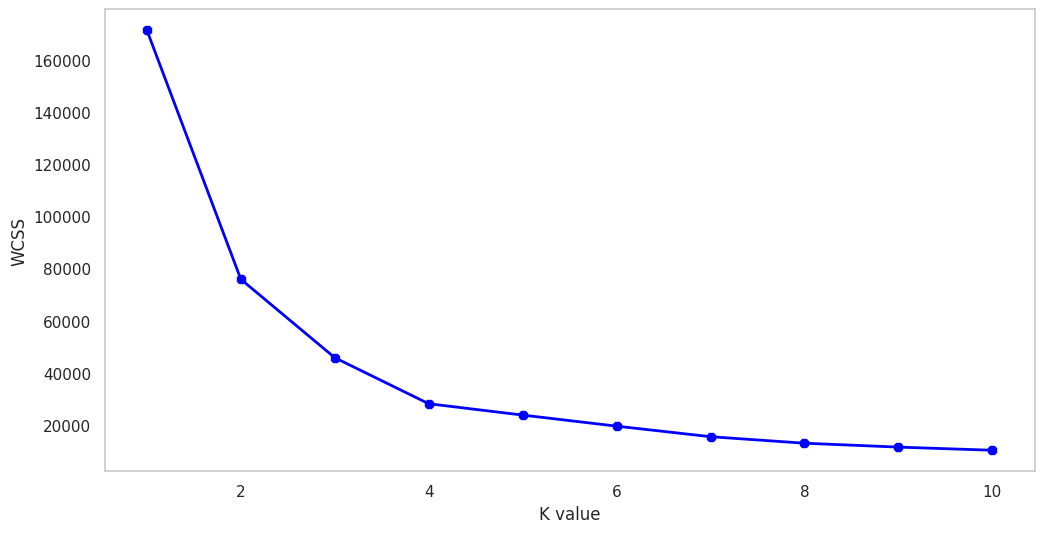

In [68]:

x1=df.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
  kmeans= KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

Here, optimal number of clusters are equal to 4

In [69]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)
print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


This is the cluster assignment

In [70]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


KMeans clustering based on Age and Spending Scores

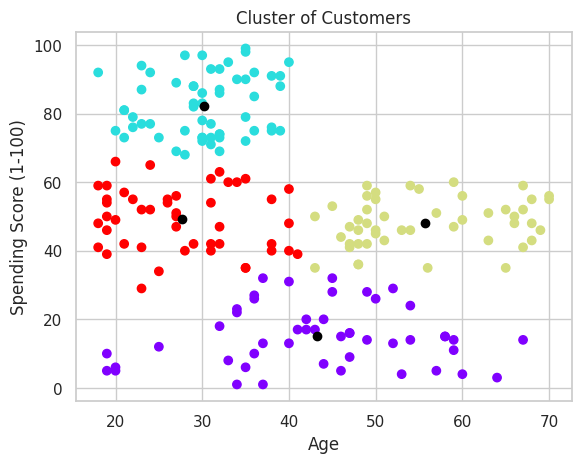

In [73]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

KMeans Clustering based on Annual Income and Spending Scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

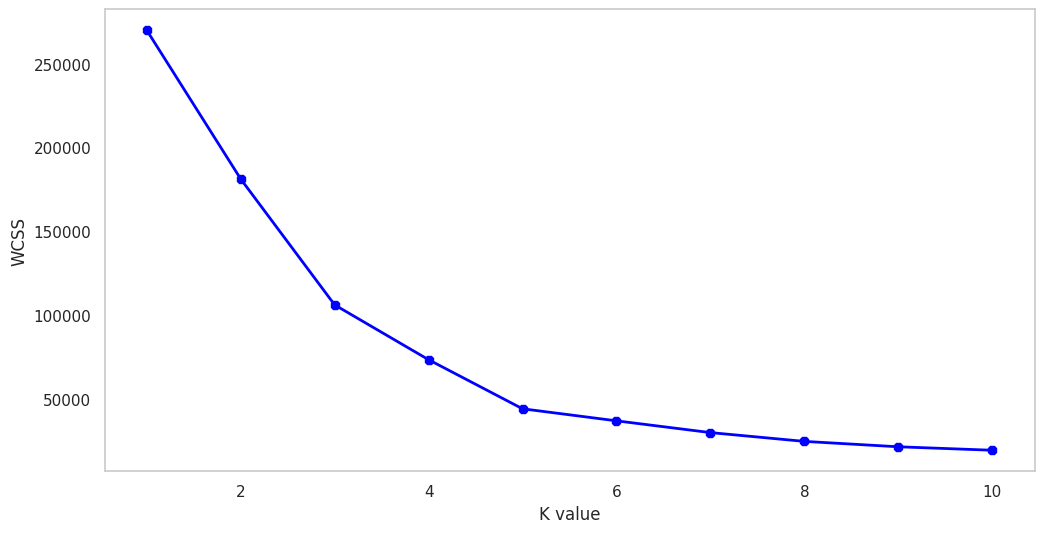

In [74]:
x2=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
  kmeans= KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [75]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 4 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 0 1 4 1 0 1 0 1 4 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [76]:
print(kmeans.cluster_centers_)


[[88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]


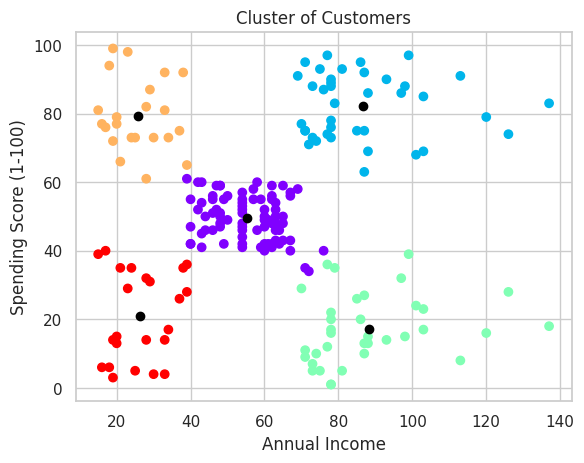

In [82]:
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")
plt.show()

KMeans clustering based on Age, Annual Income and Spending Scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

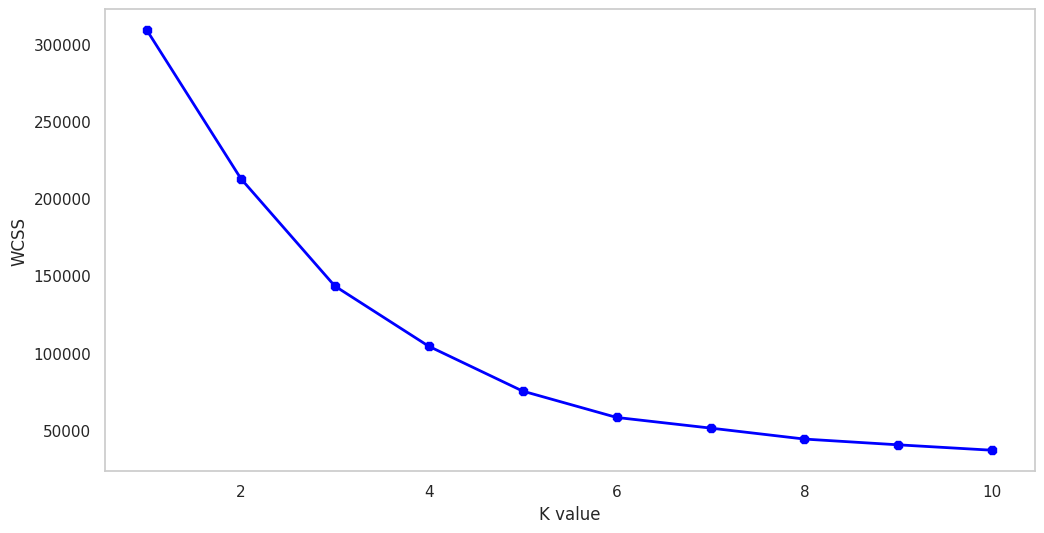

In [79]:
x3=df.iloc[:,1:]

from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
  kmeans= KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(x3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [83]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x3)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 4 1 2 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.28205128 55.02564103 49.69230769]
 [25.52173913 26.30434783 78.56521739]
 [40.32432432 87.43243243 18.18918919]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


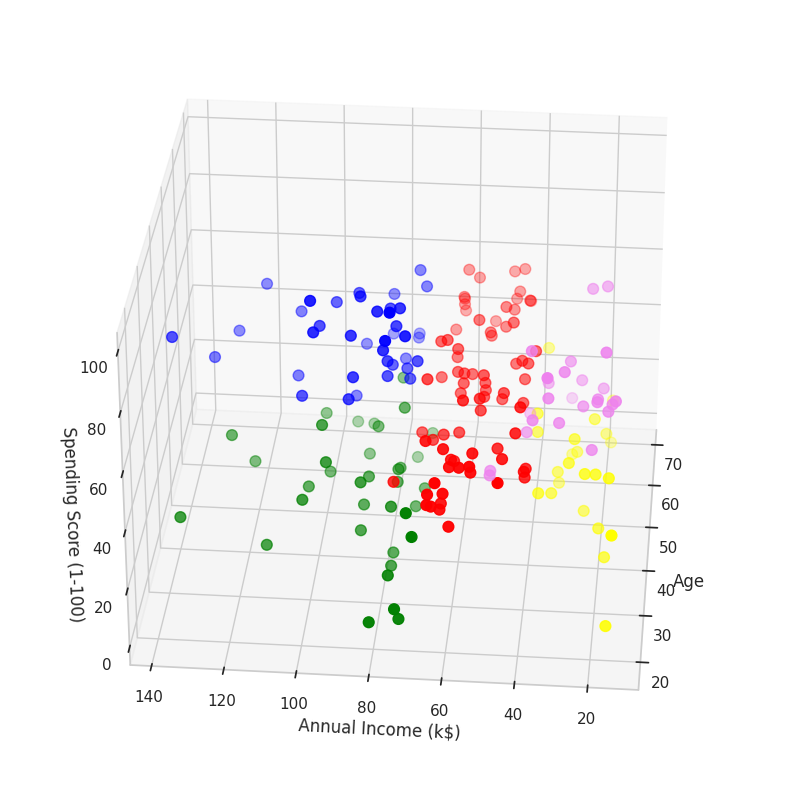

In [97]:
clusters=kmeans.fit_predict(x3)
df["label"]=clusters
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df['Annual Income (k$)'][df.label ==0],df["Spending Score (1-100)"][df.label ==0], c='blue',s=60)
ax.scatter(df.Age[df.label==1],df['Annual Income (k$)'][df.label ==1],df["Spending Score (1-100)"][df.label ==1], c='red',s=60)
ax.scatter(df.Age[df.label==2],df['Annual Income (k$)'][df.label ==2],df["Spending Score (1-100)"][df.label ==2], c='green',s=60)
ax.scatter(df.Age[df.label==3],df['Annual Income (k$)'][df.label ==3],df["Spending Score (1-100)"][df.label ==3], c='violet',s=60)
ax.scatter(df.Age[df.label==4],df['Annual Income (k$)'][df.label ==4],df["Spending Score (1-100)"][df.label ==4], c='yellow',s=60)
ax.view_init(30,185)
plt.xlabel('Age')
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

KMeans Clustering based on Age, Annual income and Spending Score

Thank you!